In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [2]:
url = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130101&end=20200320"
data_for_rolling_arima = pd.read_html(url)
# The scrapped data is a list. Converting the list to a dataframe 
data_for_rolling_arima = pd.concat(data_for_rolling_arima)
data_for_rolling_arima = data_for_rolling_arima['Close**']
data_for_rolling_arima

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


0       6185.07
1       6198.78
2       6191.19
3       5238.44
4       5225.63
         ...   
2515     105.21
2516     116.99
2517     139.00
2518     144.54
2519     134.21
Name: Close**, Length: 2520, dtype: float64

In [3]:
split_point = int(len(data_for_rolling_arima)*0.8)
split_point

2016

In [4]:
data_for_rolling_arima_train = data_for_rolling_arima[:split_point]
data_for_rolling_arima_test = data_for_rolling_arima[split_point:]
print(data_for_rolling_arima_train)
print(data_for_rolling_arima_test)

0       6185.07
1       6198.78
2       6191.19
3       5238.44
4       5225.63
         ...   
2011     424.44
2012     457.33
2013     466.06
2014     475.37
2015     477.89
Name: Close**, Length: 2016, dtype: float64
2016    479.00
2017    477.75
2018    479.75
2019    479.36
2020    475.26
         ...  
2515    105.21
2516    116.99
2517    139.00
2518    144.54
2519    134.21
Name: Close**, Length: 504, dtype: float64


In [5]:
from statsmodels.tsa.arima_model import ARIMA
history = [x for x in data_for_rolling_arima_train]
predictions = list()
for t in range(2016, 2016+len(data_for_rolling_arima_test)):
    rolling_arima_model = ARIMA(history, order=(5, 1, 5))
    rolling_arima_model_fit = rolling_arima_model.fit(disp=0)
    output = rolling_arima_model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
#     print(t)
#     print(data_for_rolling_arima_test)
    obs = data_for_rolling_arima_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=470.411852, expected=479.000000
predicted=480.365644, expected=477.750000
predicted=473.980982, expected=479.750000
predicted=475.893912, expected=479.360000
predicted=480.561805, expected=475.260000
predicted=467.239184, expected=474.600000
predicted=480.074229, expected=482.280000
predicted=470.503278, expected=484.830000
predicted=492.773398, expected=483.340000
predicted=468.948258, expected=489.660000
predicted=500.081527, expected=477.590000
predicted=461.887737, expected=477.430000
predicted=487.615100, expected=474.880000
predicted=460.337341, expected=477.760000
predicted=486.043911, expected=504.250000
predicted=494.371641, expected=508.520000
predicted=511.755080, expected=507.820000
predicted=500.611749, expected=511.150000
predicted=510.557712, expected=511.570000
predicted=510.605048, expected=502.500000
predicted=496.556920, expected=508.290000
predicted=511.438161, expected=498.080000
predicted=486.440055, expected=514.040000
predicted=522.986286, expected=517

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=660.177190, expected=640.810000
predicted=624.821589, expected=639.800000
predicted=651.874600, expected=602.720000
predicted=585.861425, expected=596.550000
predicted=606.482698, expected=597.260000
predicted=583.386632, expected=581.140000
predicted=586.807259, expected=566.340000
predicted=556.803591, expected=582.360000
predicted=585.291926, expected=593.980000
predicted=589.750049, expected=602.270000
predicted=598.212904, expected=594.990000
predicted=594.841621, expected=594.150000
predicted=586.170720, expected=598.070000
predicted=605.144046, expected=607.960000
predicted=595.386511, expected=610.860000
predicted=619.209136, expected=592.190000
predicted=574.530549, expected=592.940000
predicted=606.257982, expected=577.360000
predicted=560.292575, expected=600.160000
predicted=614.314914, expected=586.950000
predicted=566.817140, expected=633.020000
predicted=646.753517, expected=653.150000
predicted=638.579850, expected=649.160000
predicted=657.403848, expected=656

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=448.611062, expected=444.720000
predicted=442.017605, expected=437.140000
predicted=434.665887, expected=478.380000
predicted=479.890762, expected=457.000000
predicted=445.808325, expected=460.270000
predicted=465.899593, expected=491.170000
predicted=482.932174, expected=495.670000
predicted=503.519827, expected=471.240000
predicted=455.408185, expected=580.830000
predicted=595.575565, expected=583.920000
predicted=566.924519, expected=583.410000
predicted=594.970508, expected=561.270000
predicted=544.832652, expected=565.040000
predicted=576.051152, expected=571.490000
predicted=561.279153, expected=588.770000
predicted=594.007818, expected=609.890000
predicted=603.033548, expected=614.830000
predicted=612.879317, expected=622.370000
predicted=623.956653, expected=631.110000
predicted=625.305958, expected=636.120000
predicted=642.251032, expected=628.800000
predicted=614.202564, expected=638.140000
predicted=649.568645, expected=632.100000
predicted=615.783022, expected=634

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=856.349993, expected=863.220000
predicted=855.197769, expected=913.950000
predicted=922.552167, expected=868.480000
predicted=850.342858, expected=846.860000
predicted=847.316542, expected=842.720000
predicted=844.439878, expected=802.000000
predicted=800.644720, expected=953.290000
predicted=965.240512, expected=933.530000
predicted=907.133657, expected=859.510000
predicted=867.803841, expected=818.720000
predicted=803.155159, expected=802.390000
predicted=828.690834, expected=771.400000
predicted=745.541638, expected=754.010000
predicted=762.951456, expected=756.130000
predicted=731.810855, expected=745.050000
predicted=765.896789, expected=727.830000
predicted=715.533355, expected=735.070000
predicted=741.600206, expected=761.980000
predicted=745.335196, expected=682.210000
predicted=677.474416, expected=665.580000
predicted=671.639260, expected=673.410000
predicted=670.804310, expected=617.180000
predicted=616.659649, expected=605.660000
predicted=584.882033, expected=625

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=715.842125, expected=829.450000


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=821.539467, expected=1045.110000


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=1012.071024, expected=1151.170000
predicted=1146.828052, expected=1078.280000
predicted=1054.480150, expected=1043.330000
predicted=1054.602679, expected=955.850000
predicted=961.545626, expected=1129.430000
predicted=1148.501008, expected=1131.970000
predicted=1106.327314, expected=1031.950000


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=1055.555107, expected=1001.960000
predicted=1017.725381, expected=928.100000
predicted=939.294361, expected=799.110000
predicted=801.900900, expected=774.250000
predicted=751.788282, expected=797.820000
predicted=775.802514, expected=771.440000
predicted=767.102781, expected=722.430000
predicted=724.271213, expected=590.830000
predicted=563.012854, expected=584.610000
predicted=591.311194, expected=703.560000
predicted=687.602837, expected=492.110000
predicted=495.820180, expected=440.220000
predicted=433.270463, expected=417.950000
predicted=418.382140, expected=420.200000
predicted=410.341496, expected=407.370000
predicted=401.580143, expected=360.330000
predicted=356.615814, expected=342.440000
predicted=340.020779, expected=326.620000
predicted=326.185025, expected=339.110000
predicted=329.209097, expected=338.110000
predicted=337.305435, expected=296.410000
predicted=284.848554, expected=262.500000
predicted=268.863510, expected=245.240000
predicted=234.198247, expected=

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=161.006032, expected=146.250000
predicted=135.178702, expected=142.550000
predicted=147.184444, expected=145.240000
predicted=135.344833, expected=140.520000
predicted=144.104574, expected=138.130000
predicted=129.855413, expected=135.190000
predicted=136.637576, expected=130.900000
predicted=124.980724, expected=130.590000
predicted=129.796363, expected=130.690000
predicted=127.990268, expected=126.000000
predicted=121.659283, expected=126.940000
predicted=127.086649, expected=129.000000
predicted=122.373310, expected=128.550000
predicted=131.360698, expected=129.010000
predicted=120.144092, expected=123.630000
predicted=127.611810, expected=114.130000
predicted=103.828272, expected=132.180000
predicted=138.899975, expected=133.000000
predicted=122.146563, expected=137.340000
predicted=142.447938, expected=134.780000
predicted=124.433331, expected=133.780000
predicted=138.218340, expected=128.380000
predicted=120.952567, expected=128.220000
predicted=129.952866, expected=127

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=128.559013, expected=129.650000
predicted=121.447123, expected=131.470000
predicted=135.723572, expected=131.660000
predicted=122.014945, expected=131.720000
predicted=137.826280, expected=130.370000
predicted=119.112320, expected=129.220000
predicted=135.197786, expected=134.980000
predicted=124.757617, expected=133.130000
predicted=138.415626, expected=135.250000
predicted=126.320930, expected=125.910000
predicted=128.112125, expected=127.110000
predicted=121.131877, expected=121.660000
predicted=121.534673, expected=124.150000
predicted=121.546018, expected=119.150000
predicted=115.079498, expected=126.430000
predicted=127.072373, expected=126.740000
predicted=120.032284, expected=136.770000
predicted=140.897706, expected=135.850000
predicted=126.255509, expected=138.340000
predicted=143.607521, expected=135.350000
predicted=124.516492, expected=133.490000
predicted=139.895155, expected=122.390000
predicted=111.376833, expected=122.620000
predicted=128.617290, expected=126

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=96.089105, expected=105.000000
predicted=109.854255, expected=103.000000
predicted=94.440322, expected=102.800000
predicted=105.365595, expected=103.000000
predicted=97.032869, expected=106.750000
predicted=106.474222, expected=106.750000
predicted=103.895167, expected=106.220000
predicted=102.526595, expected=105.140000
predicted=105.651896, expected=104.000000
predicted=97.222401, expected=104.500000
predicted=107.877244, expected=104.000000
predicted=94.633989, expected=106.090000
predicted=111.589108, expected=107.990000
predicted=97.303195, expected=101.200000
predicted=106.989979, expected=99.760000
predicted=89.092891, expected=94.120000
predicted=99.584654, expected=96.020000
predicted=86.711825, expected=96.900000
predicted=100.687369, expected=94.510000
predicted=86.744260, expected=95.560000
predicted=97.048548, expected=91.610000
predicted=86.721799, expected=90.760000
predicted=89.632883, expected=89.390000
predicted=87.531722, expected=92.170000
predicted=87.696

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=92.801526, expected=107.600000
predicted=113.427047, expected=108.300000
predicted=98.937759, expected=109.500000
predicted=113.319011, expected=110.150000
predicted=102.575304, expected=108.250000
predicted=110.148258, expected=107.400000
predicted=102.739942, expected=101.700000
predicted=100.225679, expected=99.510000
predicted=97.491917, expected=99.990000
predicted=95.818879, expected=99.980000
predicted=101.223196, expected=104.000000
predicted=97.414213, expected=108.150000
predicted=111.512117, expected=108.900000
predicted=106.784530, expected=106.350000
predicted=103.641819, expected=100.000000
predicted=98.429730, expected=108.300000
predicted=106.276722, expected=111.500000


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=109.139876, expected=118.000000
predicted=115.888614, expected=121.650000
predicted=119.021406, expected=121.420000
predicted=120.135374, expected=122.220000
predicted=118.853390, expected=122.290000
predicted=120.158409, expected=129.300000
predicted=127.059820, expected=129.000000
predicted=126.418132, expected=128.800000
predicted=127.563692, expected=132.300000
predicted=129.590100, expected=129.000000


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=119.600077, expected=129.740000
predicted=127.082567, expected=133.480000
predicted=131.083806, expected=131.980000
predicted=130.430935, expected=133.200000
predicted=123.745907, expected=126.700000
predicted=124.595303, expected=123.890000
predicted=122.088655, expected=122.880000
predicted=120.618194, expected=122.000000
predicted=118.171728, expected=121.990000
predicted=119.168159, expected=123.500000
predicted=121.030413, expected=123.010000
predicted=120.368264, expected=118.760000
predicted=117.551476, expected=114.220000
predicted=111.361757, expected=111.500000
predicted=109.025272, expected=117.980000
predicted=116.141848, expected=115.000000
predicted=111.937466, expected=115.240000
predicted=113.345791, expected=117.200000
predicted=114.737776, expected=112.670000
predicted=110.936738, expected=113.570000
predicted=111.254965, expected=111.500000
predicted=108.690199, expected=112.300000
predicted=110.017972, expected=115.910000
predicted=113.568322, expected=112

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=104.537611, expected=116.990000
predicted=115.163125, expected=139.000000
predicted=137.363560, expected=144.540000
predicted=141.218261, expected=134.210000


Test MSE: 1170.672
R2 score: 0.984005


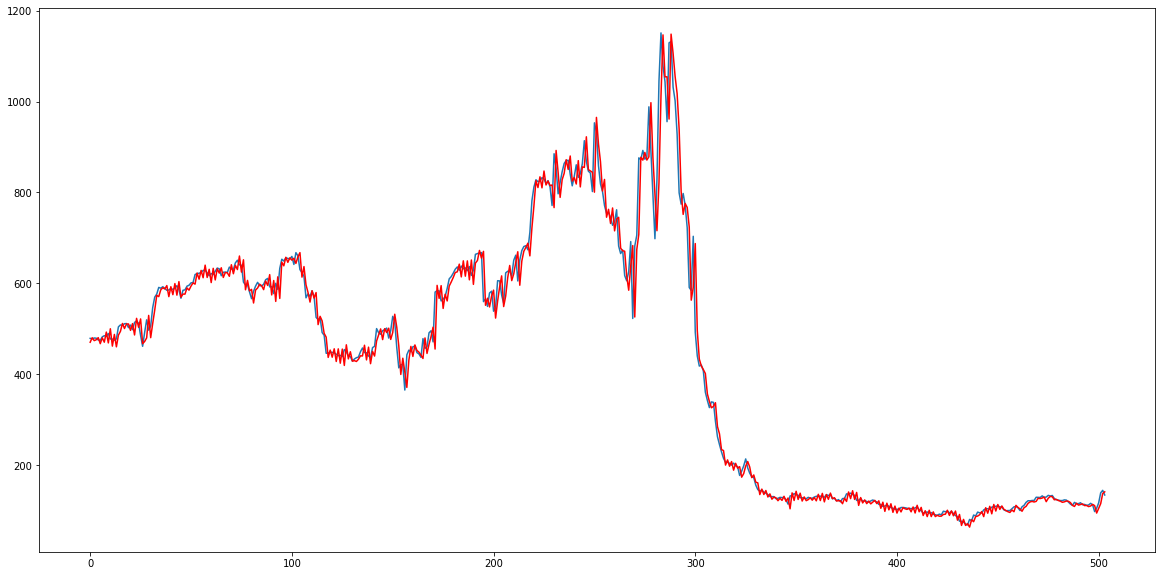

In [6]:
data_for_rolling_arima_test.reset_index(drop=True, inplace=True)
error = mean_squared_error(data_for_rolling_arima_test, predictions)
print('Test MSE: %.3f' % error)

from sklearn.metrics import r2_score
print('R2 score: %f' % r2_score(data_for_rolling_arima_test, predictions))
pyplot.figure(figsize=(20,10)) 

pyplot.plot(data_for_rolling_arima_test)
pyplot.plot(predictions, color='red')
pyplot.show()